In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

In [3]:
shells = np.genfromtxt('/home/marslast/Projects/AllPots/Data/Shells/shells_coords2.csv', delimiter=',')
nshells = len(shells)
npoints = np.shape(shells)[1]//2

In [4]:
# Perform PCA
C = np.cov(shells.T)

# Get the eigenvalues and eigenvectors
evals,evecs = np.linalg.eig(C)

# Now need to sort them into descending order
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]
evecs = np.real(evecs)
evals = np.real(evals)
m = np.mean(shells,axis=0).reshape((npoints,2))
#evecs = evecs.reshape((npoints,2,npoints*2))

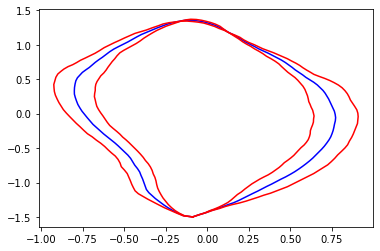

In [5]:
# Plot a principal component
evecs2 = evecs.reshape((npoints,2,npoints*2))
sd = 1
pc = 2
pl.plot(m[:,0],m[:,1],'b')
pl.plot(m[:,0] - np.sqrt(evals[pc])*sd*evecs2[:,0,pc],m[:,1] - np.sqrt(evals[pc])*sd*evecs2[:,1,pc],'r') 
pl.plot(m[:,0] + np.sqrt(evals[pc])*sd*evecs2[:,0,pc],m[:,1] + np.sqrt(evals[pc])*sd*evecs2[:,1,pc],'r') 


Number of dims to use: 5


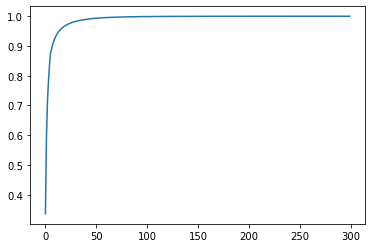

In [6]:
# Scree plot of the cumulative sum of variances
cs = np.cumsum(evals)
cs /= cs[-1]
pl.plot(cs)
varToSave = 0.85
print("Number of dims to use:",np.where(cs>varToSave*cs[-1])[0][0])

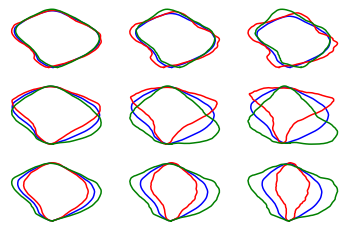

In [49]:
# Plot of the first three principal components
for pc in range(3):
    for sd in range(1,4):
        pl.subplot(3,3,pc*3+sd);
        pl.plot(m[:,0],m[:,1],'b')
        pl.plot(m[:,0] - np.sqrt(evals[pc])*sd*evecs2[:,0,pc],m[:,1] - np.sqrt(evals[pc])*sd*evecs2[:,1,pc],'r') 
        pl.plot(m[:,0] + np.sqrt(evals[pc])*sd*evecs2[:,0,pc],m[:,1] + np.sqrt(evals[pc])*sd*evecs2[:,1,pc],'g')         
        pl.axis('off')

In [56]:
# Plot according to PCA locations in 2D

# This sets up the colours for PCA plotting
ind = np.loadtxt('/home/marslast/Projects/AllPots/Code/shell_list.txt')
cl = np.unique(ind[:,2]).astype(int)

import matplotlib.colors as plc
cmap = pl.cm.get_cmap('inferno')
cnorm = plc.Normalize(vmin=0.0,vmax=len(cl))
colours = {}

count = 0
for i in cl:
    colours[i] = cmap((cnorm(count)))
    count += 1

def meanshape(shells):
    means = np.zeros((10,npoints*2))
    for i in range(len(cl)):
        which = np.where(ind[:,2]==cl[i])
        means[i,:] = np.mean(shells[which,:],axis=1)
    return means

def plotpca(pca,shells,x,y,scaling=None,shift=None):
    means = meanshape(shells)
    pl.figure(figsize=(20,20));
    if scaling is None:
        scaling=1
    #print(scaling)
    if shift is None:
        shift = np.array([0,0])
    for i, (pr, x, y) in enumerate(zip(pca, x,y)):
         pl.plot(pr[0],pr[1],'.',color=colours[int(ind[i,2])],markersize=10);
    for i in range(len(cl)):
        which = np.where(ind[:,2]==cl[i])
        mean = np.squeeze(np.median(pca[which,:],axis=1))
        pl.plot(mean[0]+ means[i,::2]/scaling,mean[1] + means[i,1::2]/scaling,color=colours[cl[i]],linewidth=3);
                        
        #pl.text(-pr[0]+shift[0],pr[1]+shift[1],i, bbox={'facecolor':'white', 'edgecolor': 'white', 'alpha':.5});


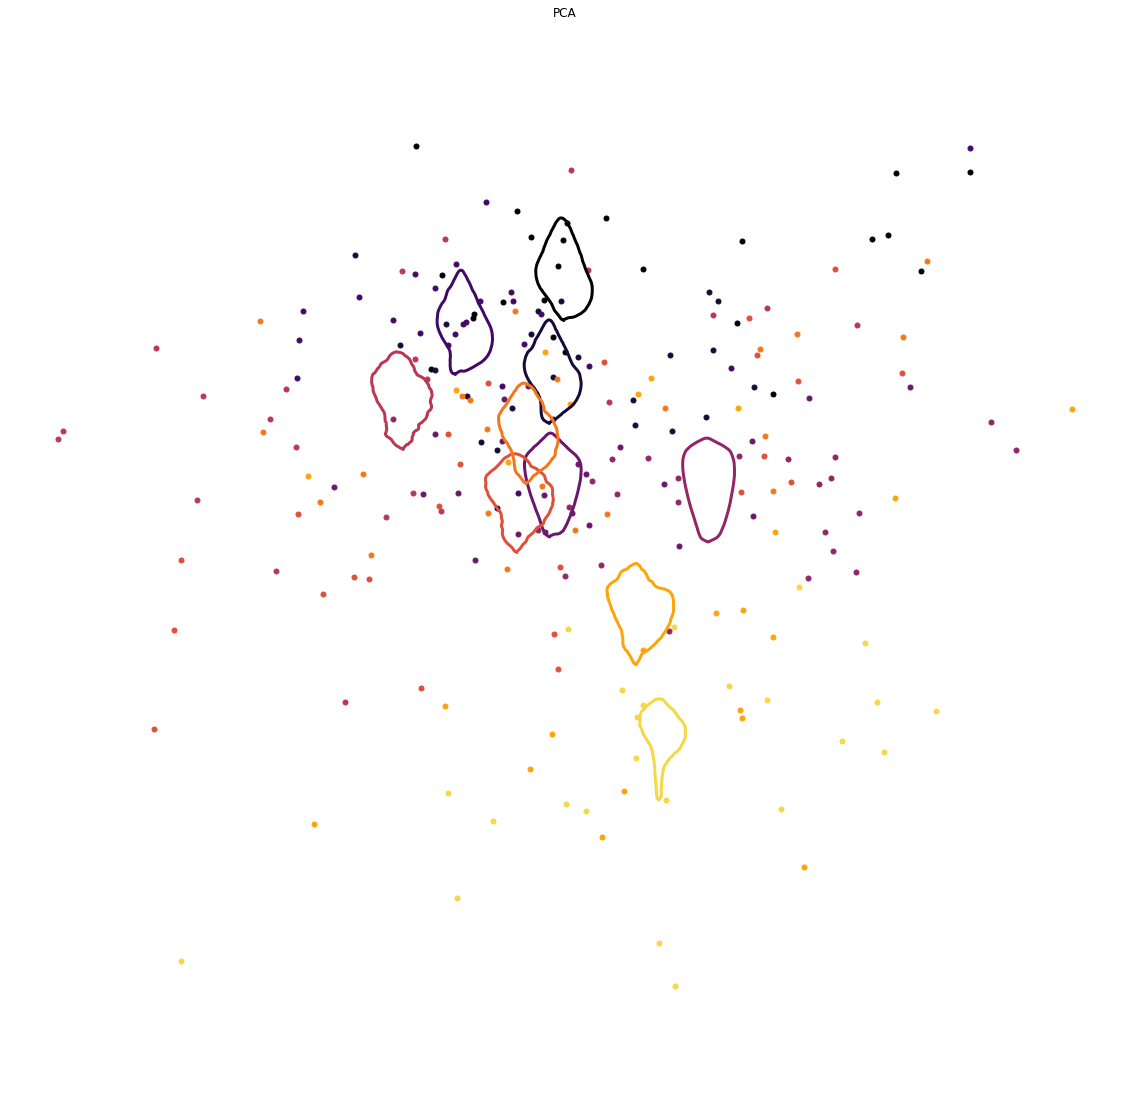

In [58]:
ndim = 2
m = np.mean(shells,axis=0)
b = np.zeros((nshells,ndim))
for i in range(nshells):
    P = evecs[:,:ndim]
    b[i,:] = np.dot(P.T,(shells[i,:]-m))

shells2 = shells.reshape(nshells,npoints,2)
plotpca(b,shells,shells2[:,:,0],shells2[:,:,1],scaling=3)
pl.axis('equal')
pl.axis('off')
pl.title('PCA');
pl.savefig('Shells_PCA.pdf',dpi=600)

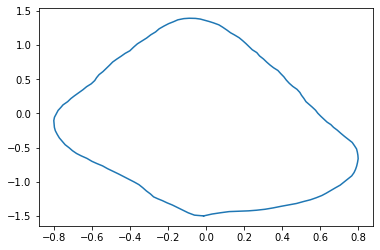

In [50]:
m = meanshape(shells)
np.shape(m)
pl.plot(m[0,::2],m[0,1::2])